<a href="https://colab.research.google.com/github/Kimsumin1234/data_analysis/blob/main/6_%EC%84%9C%EC%9A%B8%EC%8B%9C_CCTV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 셋 수집
- 서울 열린 데이터 광장
  - 서울시 5대 범죄 발생현황
  - 자치구 년도별 cctv 설치현황
  - 주민등록인구(구별) 통계

In [1]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

### 데이터 로드

In [4]:
# cctv
# skiprows=2 : 2줄 스킵
# skiprows=[0,1,3] : 인덱스 지정한거만 스킵

df_cctv = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/서울시 CCTV 설치 현황.xlsx',
                          skiprows=[0,1,3],usecols='C,E:N',thousands=',')
df_cctv.head()

,구분,2015년 이전\n설치된 CCTV,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년
0,종로구,549,158,128,143,142,67,237,82,225,300
1,중 구,275,236,239,372,386,155,364,419,137,135
2,용산구,88,38,295,491,147,335,473,486,500,405
3,성동구,190,352,278,939,457,640,483,366,233,471
4,광진구,309,95,42,666,460,712,191,740,273,340


### 데이터 전처리

In [5]:
df_cctv.shape

(25, 11)

In [6]:
df_cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   구분                 25 non-null     object
 1   2015년 이전
설치된 CCTV  25 non-null     int64 
 2   2015년              25 non-null     int64 
 3   2016년              25 non-null     int64 
 4   2017년              25 non-null     int64 
 5   2018년              25 non-null     int64 
 6   2019년              25 non-null     int64 
 7   2020년              25 non-null     int64 
 8   2021년              25 non-null     int64 
 9   2022년              25 non-null     int64 
 10  2023년              25 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.3+ KB


In [7]:
# 구분 => 구 별, 2015년 이전\n설치된 CCTV => 2015년 이전 컬럼명 변경

df_cctv.rename(columns={'구분':'구 별','2015년 이전\n설치된 CCTV':'2015년 이전'},inplace=True)
df_cctv.columns

Index(['구 별', '2015년 이전', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년',
       '2021년', '2022년', '2023년'],
      dtype='object')

In [8]:
# df_cctv['2020년 이전'] 컬럼 생성

# df_cctv['2020년 이전'] = df_cctv['2015년 이전'] + df_cctv['2015년'] + df_cctv['2016년'] + df_cctv['2017년'] + df_cctv['2018년'] + df_cctv['2019년'] + df_cctv['2020년']
# df_cctv

# sum(axis=1) : row 방향으로 더하기
df_cctv[['2015년 이전', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년']].sum(axis=1).head()

df_cctv['2020년 이전'] = df_cctv[['2015년 이전', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년']].sum(axis=1)

In [9]:
# 사용할 컬럼 : 구 별, 2021년,	2022년,	2023년,2020년 이전
# copy() : df_cctv = df_cctv[['구 별','2021년','2022년','2023년','2020년 이전']].copy()
# drop()

df_cctv.drop(columns=['2015년 이전', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년'],inplace=True)
# df_cctv.drop(columns=df_cctv[df_cctv.columns.difference(['구 별','2021년','2022년','2023년','2020년 이전'])])

In [10]:
df_cctv.head()

,구 별,2021년,2022년,2023년,2020년 이전
0,종로구,82,225,300,1424
1,중 구,419,137,135,2027
2,용산구,486,500,405,1867
3,성동구,366,233,471,3339
4,광진구,740,273,340,2475


In [11]:
# df_cctv['cctv 총계'] 컬럼 생성하기

df_cctv['cctv 총계'] = df_cctv[['2021년','2022년','2023년','2020년 이전']].sum(axis=1)
df_cctv.head()

,구 별,2021년,2022년,2023년,2020년 이전,cctv 총계
0,종로구,82,225,300,1424,2031
1,중 구,419,137,135,2027,2718
2,용산구,486,500,405,1867,3258
3,성동구,366,233,471,3339,4409
4,광진구,740,273,340,2475,3828


In [12]:
# 구 별 cctv 가 가장 적게 설치되어 있는 구

df_cctv[df_cctv['cctv 총계'].min() == df_cctv['cctv 총계']]

,구 별,2021년,2022년,2023년,2020년 이전,cctv 총계
0,종로구,82,225,300,1424,2031


In [13]:
# 구 별 cctv 가 가장 많이 설치되어 있는 구

df_cctv[df_cctv['cctv 총계'].max() == df_cctv['cctv 총계']]

,구 별,2021년,2022년,2023년,2020년 이전,cctv 총계
22,강남구,505,588,446,6182,7721


### 서울시 거주 인구 데이터 로드

In [14]:
# 주민등록인구(월별)

df_seoul = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/서울시 주민등록인구(월별).xlsx',
                          skiprows=[0,1],usecols='B,D,G,J',thousands=',')
df_seoul.head()

,동별(2),소계.1,소계.2,소계.3
0,종로구,150447,139432,11015
1,중구,131886,121607,10279
2,용산구,221508,207969,13539
3,성동구,284141,276847,7294
4,광진구,350624,334790,15834


### 데이터 전처리

In [15]:
# 컬럼명 변경

df_seoul.columns = ['구 별','총인구','한국인','외국인']
df_seoul.columns

Index(['구 별', '총인구', '한국인', '외국인'], dtype='object')

In [16]:
# 중 구
df_cctv['구 별']

0      종로구
1      중 구
2      용산구
3      성동구
4      광진구
5     동대문구
6      중랑구
7      성북구
8      강북구
9      도봉구
10     노원구
11     은평구
12    서대문구
13     마포구
14     양천구
15     강서구
16     구로구
17     금천구
18    영등포구
19     동작구
20     관악구
21     서초구
22     강남구
23     송파구
24     강동구
Name: 구 별, dtype: object

In [17]:
# 중구
df_seoul['구 별']

0      종로구
1       중구
2      용산구
3      성동구
4      광진구
5     동대문구
6      중랑구
7      성북구
8      강북구
9      도봉구
10     노원구
11     은평구
12    서대문구
13     마포구
14     양천구
15     강서구
16     구로구
17     금천구
18    영등포구
19     동작구
20     관악구
21     서초구
22     강남구
23     송파구
24     강동구
Name: 구 별, dtype: object

In [18]:
# df_cctv['구 별'] : 중 구 ==> 중구 변경
# df_cctv.loc[1, '구 별'] = '중구'
df_cctv.iloc[1, 0] = '중구'

In [19]:
df_cctv.head()

,구 별,2021년,2022년,2023년,2020년 이전,cctv 총계
0,종로구,82,225,300,1424,2031
1,중구,419,137,135,2027,2718
2,용산구,486,500,405,1867,3258
3,성동구,366,233,471,3339,4409
4,광진구,740,273,340,2475,3828


In [20]:
# 어느 구에 외국인이 가장 많은가?

df_seoul[df_seoul['외국인'].max() == df_seoul['외국인']]

,구 별,총인구,한국인,외국인
16,구로구,413790,390952,22838


In [21]:
# 외국인이 많은 순서대로 정렬해보기

df_seoul.sort_values('외국인',ascending=False)

,구 별,총인구,한국인,외국인
16,구로구,413790,390952,22838
18,영등포구,397830,375090,22740
5,동대문구,360472,341981,18491
20,관악구,497938,481722,16216
4,광진구,350624,334790,15834
12,서대문구,320933,306001,14932
2,용산구,221508,207969,13539
17,금천구,240425,226955,13470
7,성북구,437188,424663,12525
13,마포구,374626,363449,11177


In [23]:
# cctv 설치 대수 대비 범죄율 파악하기
# df_cctv 랑 df_seoul 이랑 merge 를 해야한다 (이걸 하려고 중 구 => 중구 함)

# concat() : 기본이 위아래로 연결,옆으로도 가능,가장심플한 연결방법
# merge() : sql join 에 개념, 조건을 줘서 연결하는방법
# df_cctv.merge(df_seoul)
df_merge = pd.merge(df_cctv,df_seoul,on='구 별')

In [25]:
# 구 별 인덱스 설정

df_merge.set_index('구 별', inplace=True)

In [26]:
# 1인당 cctv 비율 = cctv 총계 / 총인구

df_merge['1인당 cctv 비율'] = df_merge['cctv 총계'] / df_merge['총인구'] * 100
df_merge.head()

,2021년,2022년,2023년,2020년 이전,cctv 총계,총인구,한국인,외국인,1인당 cctv 비율
구 별,,,,,,,,,
종로구,82,225,300,1424,2031,150447,139432,11015,1.349977
중구,419,137,135,2027,2718,131886,121607,10279,2.060871
용산구,486,500,405,1867,3258,221508,207969,13539,1.470827
성동구,366,233,471,3339,4409,284141,276847,7294,1.551694
광진구,740,273,340,2475,3828,350624,334790,15834,1.091768


In [28]:
# 상관관계 : 두 변수 간에 어떤 선형적 관계를 갖고 있는지 분석
#            총인구 와 cctv 총계 가 어떤 관계가 있는가?
# 상관계수 : +1 쪽에 가까울수록 관계가 깊다, -1 에 가까울수록 정반대의 관계
#            +1 or -1 에 가까울수록 상관관계가 높아짐
#            - 인 경우는 부정적인 관계, + 인 경우는 양의 상관관계, 0 은 관계 없음

# corr(시리즈,계산방식)
df_merge['총인구'].corr(df_merge['cctv 총계'],method='spearman')


0.5538461538461539

In [29]:
df_merge['외국인'].corr(df_merge['cctv 총계'],method='spearman')

0.06538461538461539

### 시각화

Text(0, 0.5, '구 별')

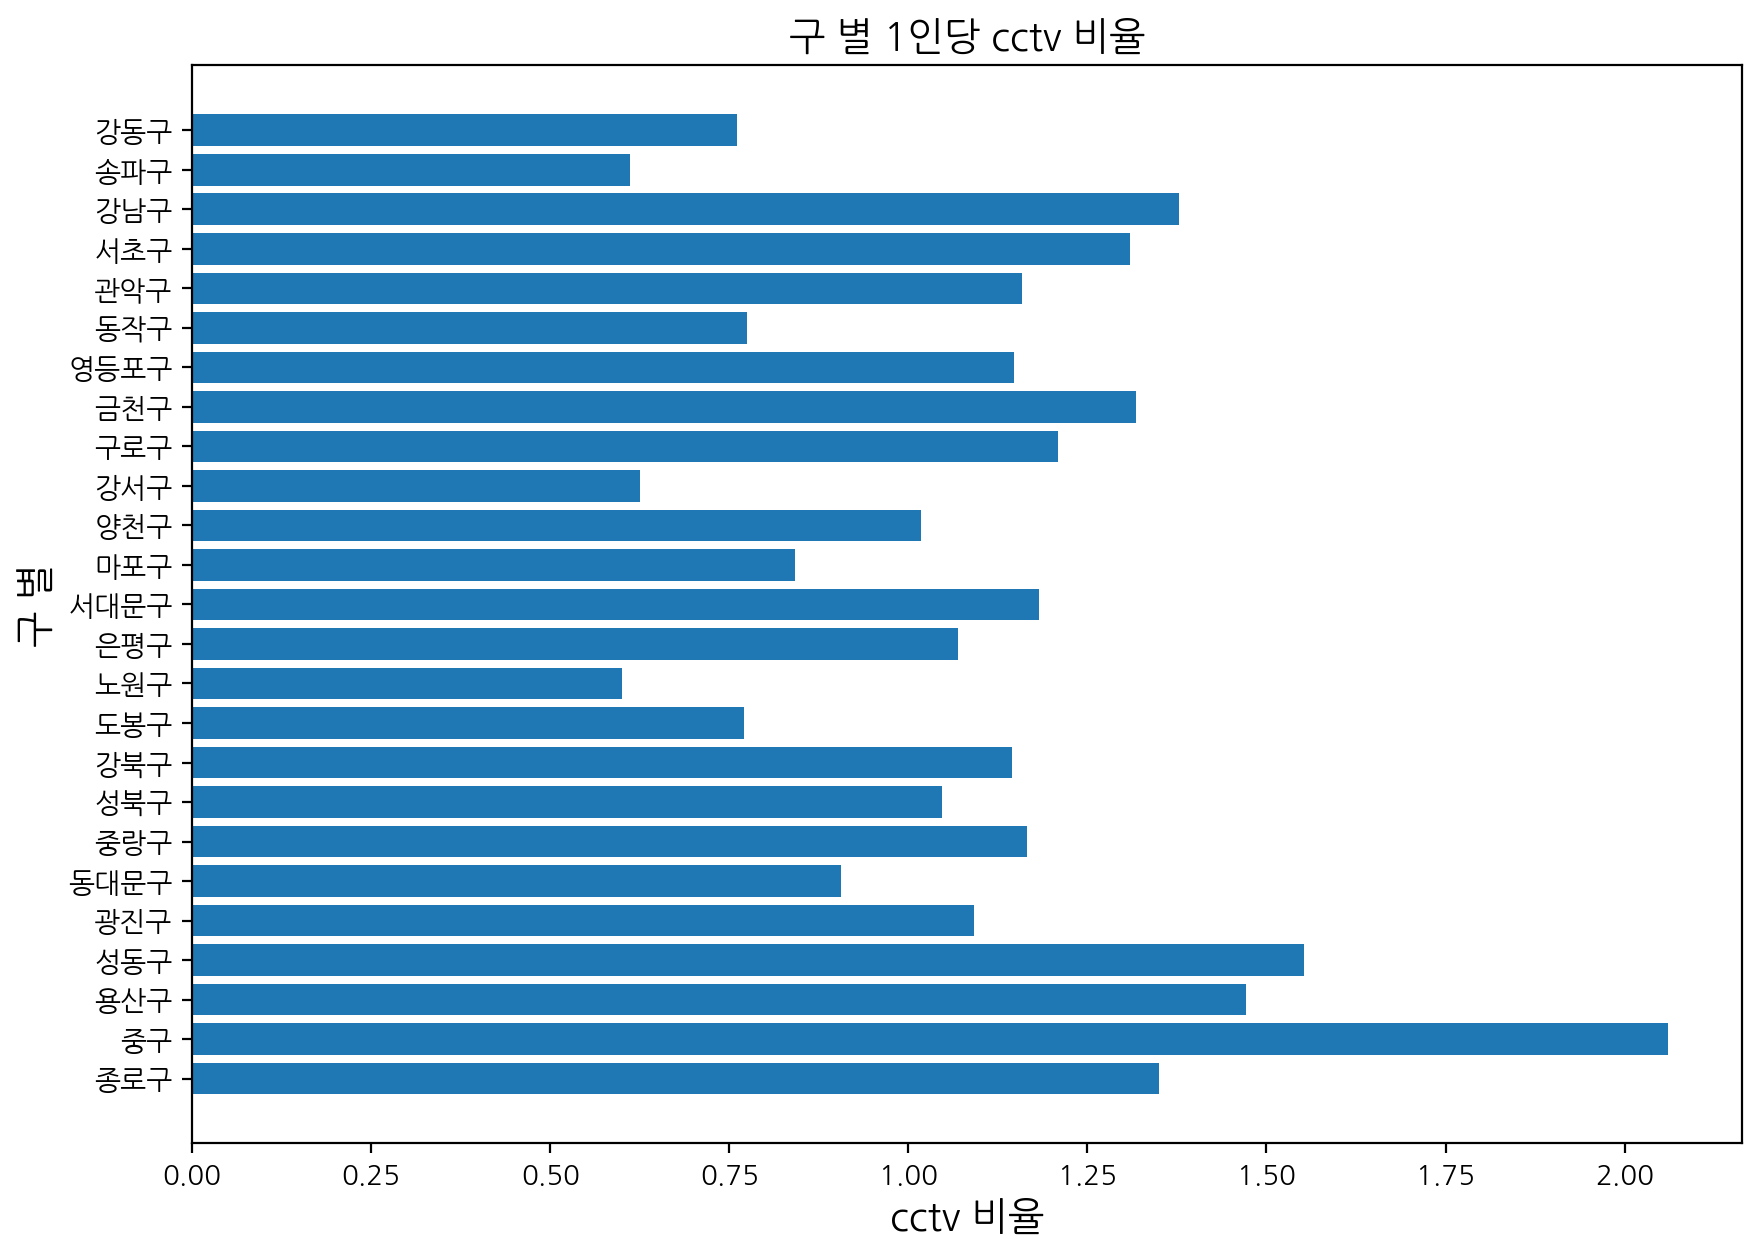

In [36]:
# 구 별 1 인당 cctv 비율 그래프 그리기

plt.figure(figsize=(10,7))
plt.title('구 별 1인당 cctv 비율',fontsize=14)
plt.barh(y=df_merge.index, width=df_merge['1인당 cctv 비율'])
plt.xlabel('cctv 비율',fontsize=14)
plt.ylabel('구 별',fontsize=14)

Text(0.5, 1.0, '구 별 1인당 cctv 비율')

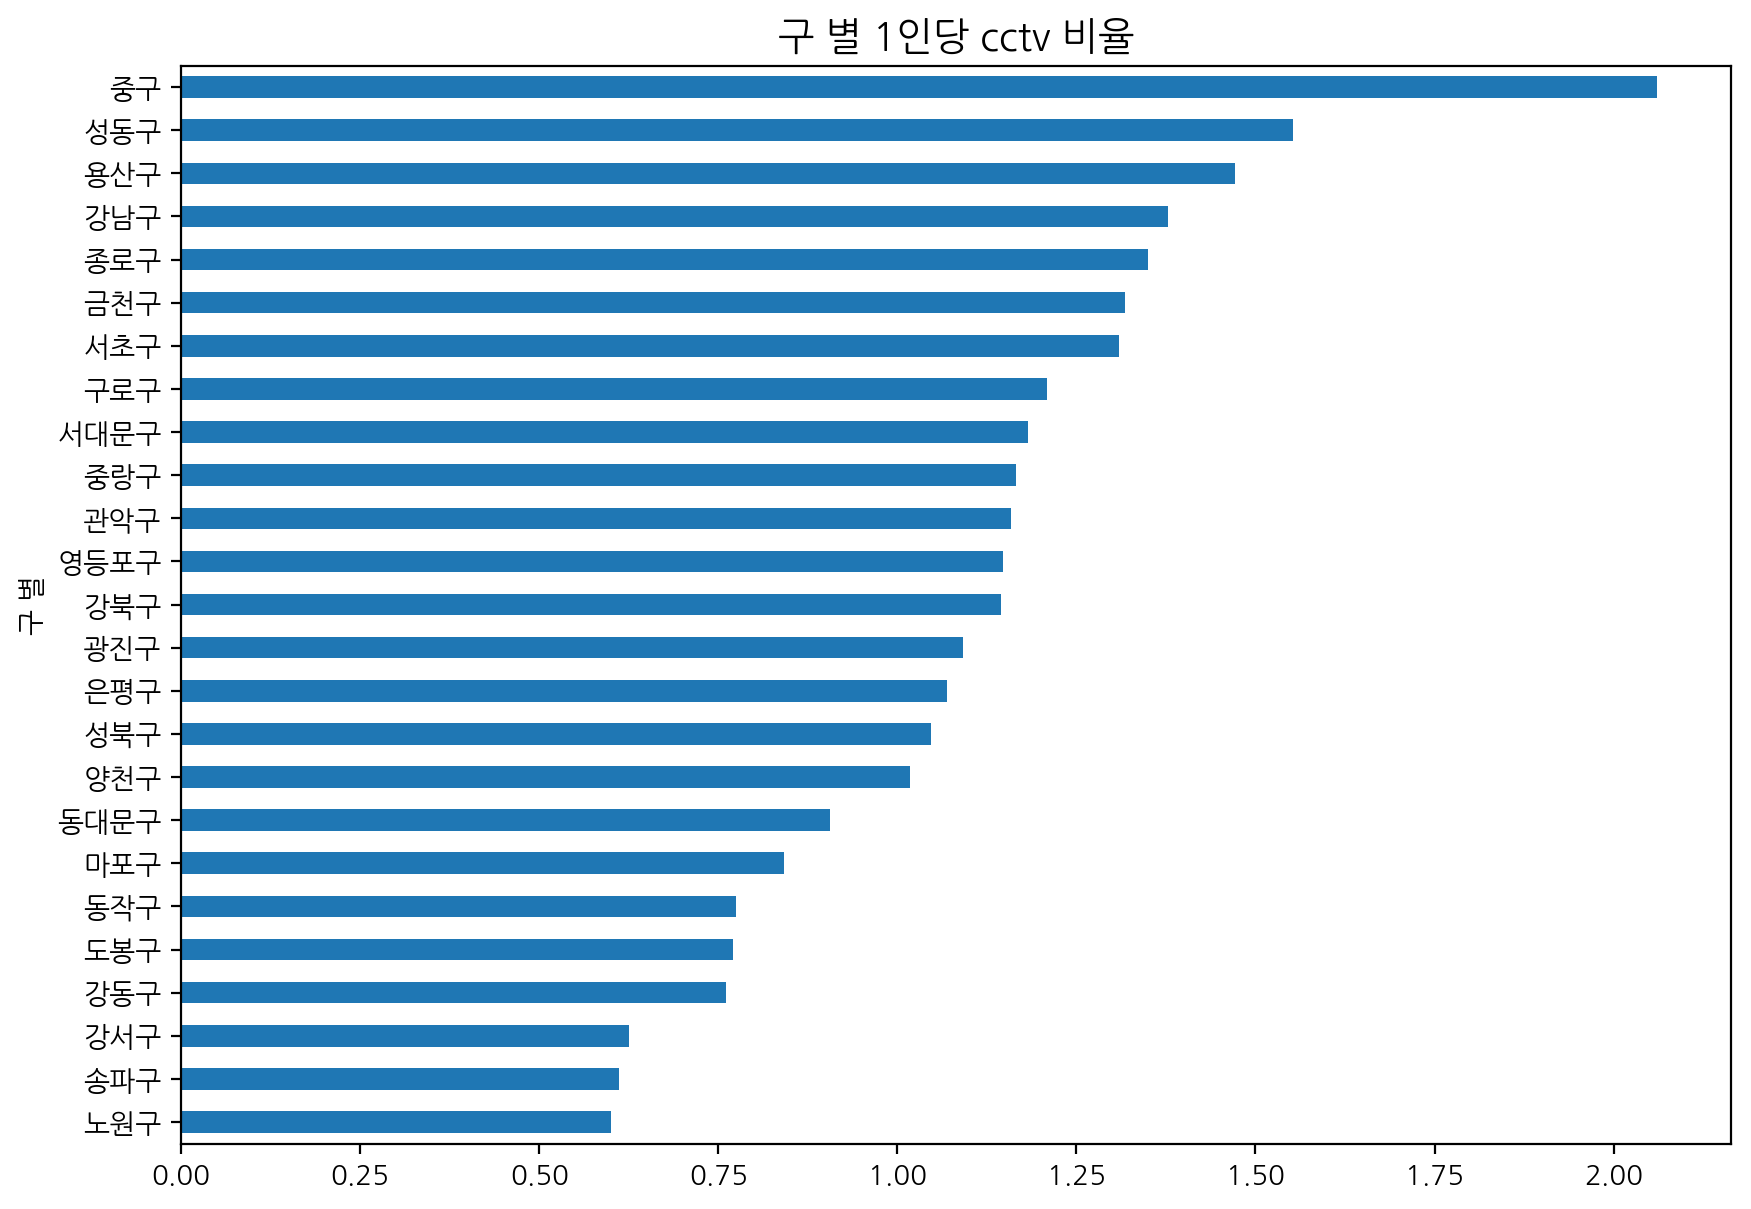

In [38]:
# pandas 로 그리기

# df_merge['1인당 cctv 비율'].plot.barh(figsize=(10,7))
# plt.title('구 별 1인당 cctv 비율',fontsize=14)

# sort_values() 사용
df_merge['1인당 cctv 비율'].sort_values().plot.barh(figsize=(10,7))
plt.title('구 별 1인당 cctv 비율',fontsize=14)

### 5대 범죄 데이터 로드

In [40]:
df_crime = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/분석프로젝트/서울시5대범죄.xlsx',
                          skiprows=[0,1,2,4],usecols='B:D',thousands=',')
df_crime.head()

,자치구별(2),발생,검거
0,종로구,3138,3284
1,중구,3071,2119
2,용산구,2967,2093
3,성동구,2194,1597
4,광진구,3619,2498


In [41]:
# 컬럼명 변경

df_crime.columns = ['구 별','범죄건','검거건']
df_crime.columns

Index(['구 별', '범죄건', '검거건'], dtype='object')

In [43]:
# 구 별 인덱스 설정

df_crime.set_index('구 별',inplace=True)

In [48]:
# df_merge 와 df_crime 합치기

# 0 번 칼럼이 달라서 이거는 안된다
# df_crime_merge = df_crime.merge(df_merge)
# 인덱스를 맞춰서 이렇게 하면됨
# df_crime_merge = df_crime.merge(df_merge, left_index=True, right_index=True)

# concat()
# pd.concat([df_merge,df_crime], axis=1)

df_crime_merge = pd.merge(df_merge,df_crime,on='구 별')
df_crime_merge.head()

,2021년,2022년,2023년,2020년 이전,cctv 총계,총인구,한국인,외국인,1인당 cctv 비율,범죄건,검거건
구 별,,,,,,,,,,,
종로구,82,225,300,1424,2031,150447,139432,11015,1.349977,3138,3284
중구,419,137,135,2027,2718,131886,121607,10279,2.060871,3071,2119
용산구,486,500,405,1867,3258,221508,207969,13539,1.470827,2967,2093
성동구,366,233,471,3339,4409,284141,276847,7294,1.551694,2194,1597
광진구,740,273,340,2475,3828,350624,334790,15834,1.091768,3619,2498


In [49]:
# 검거율
# 다른 동네에서 범죄를 하고 종로구에서 검거가 된 경우가 있어서 100프로가 넘게 나온다

df_crime_merge['검거율'] = df_crime_merge['검거건'] / df_crime_merge['범죄건'] * 100

In [50]:
df_crime_merge.head()

,2021년,2022년,2023년,2020년 이전,cctv 총계,총인구,한국인,외국인,1인당 cctv 비율,범죄건,검거건,검거율
구 별,,,,,,,,,,,,
종로구,82,225,300,1424,2031,150447,139432,11015,1.349977,3138,3284,104.652645
중구,419,137,135,2027,2718,131886,121607,10279,2.060871,3071,2119,69.000326
용산구,486,500,405,1867,3258,221508,207969,13539,1.470827,2967,2093,70.542636
성동구,366,233,471,3339,4409,284141,276847,7294,1.551694,2194,1597,72.789426
광진구,740,273,340,2475,3828,350624,334790,15834,1.091768,3619,2498,69.024592


Text(0, 0.5, 'cctv 총계')

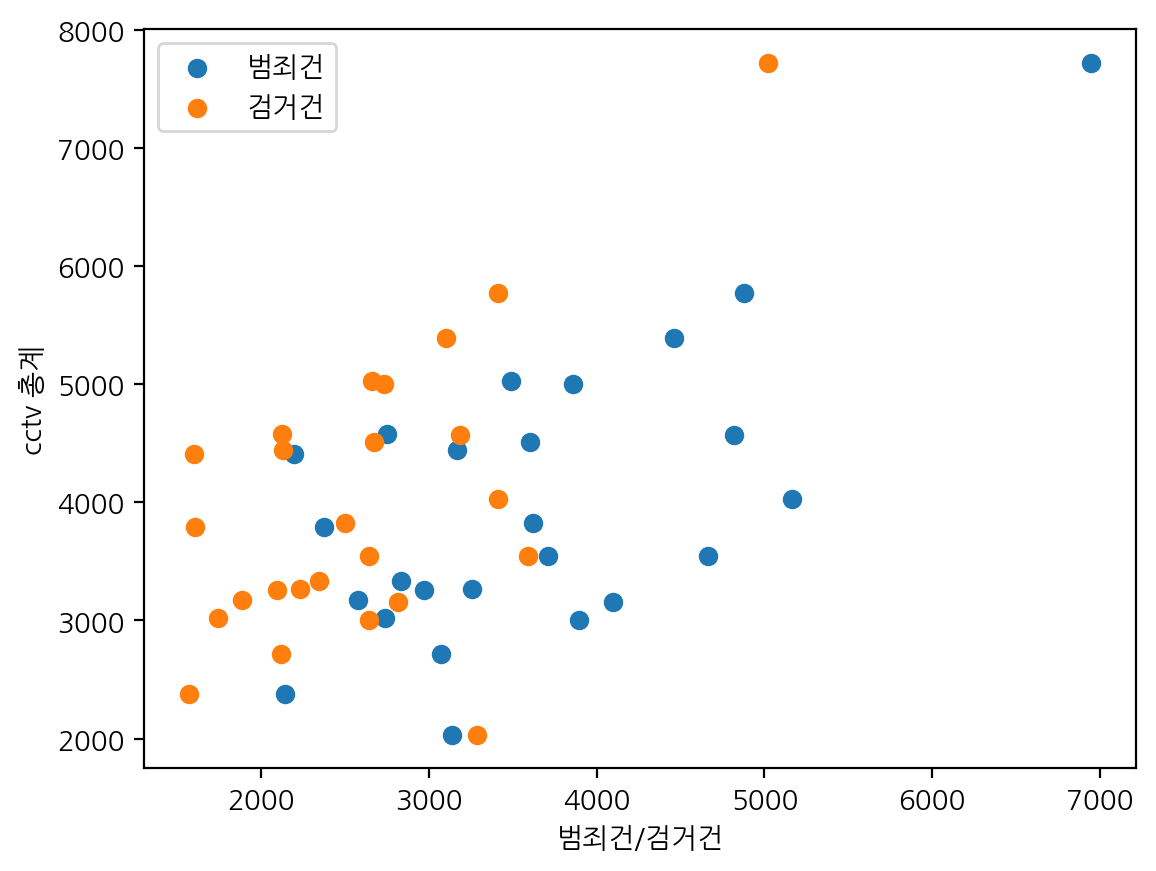

In [55]:
# scatter(산점도) 차트 : 두 변수 사이의 상관관계를 나타내는 차트
# y 축 : cctv 총계 , x 축 : 범죄건, 검거건

plt.scatter(df_crime_merge['범죄건'],df_crime_merge['cctv 총계'])
plt.scatter(df_crime_merge['검거건'],df_crime_merge['cctv 총계'])
plt.legend(['범죄건','검거건'])
plt.xlabel('범죄건/검거건')
plt.ylabel('cctv 총계')

Text(0.5, 0, '범죄건/검거건')

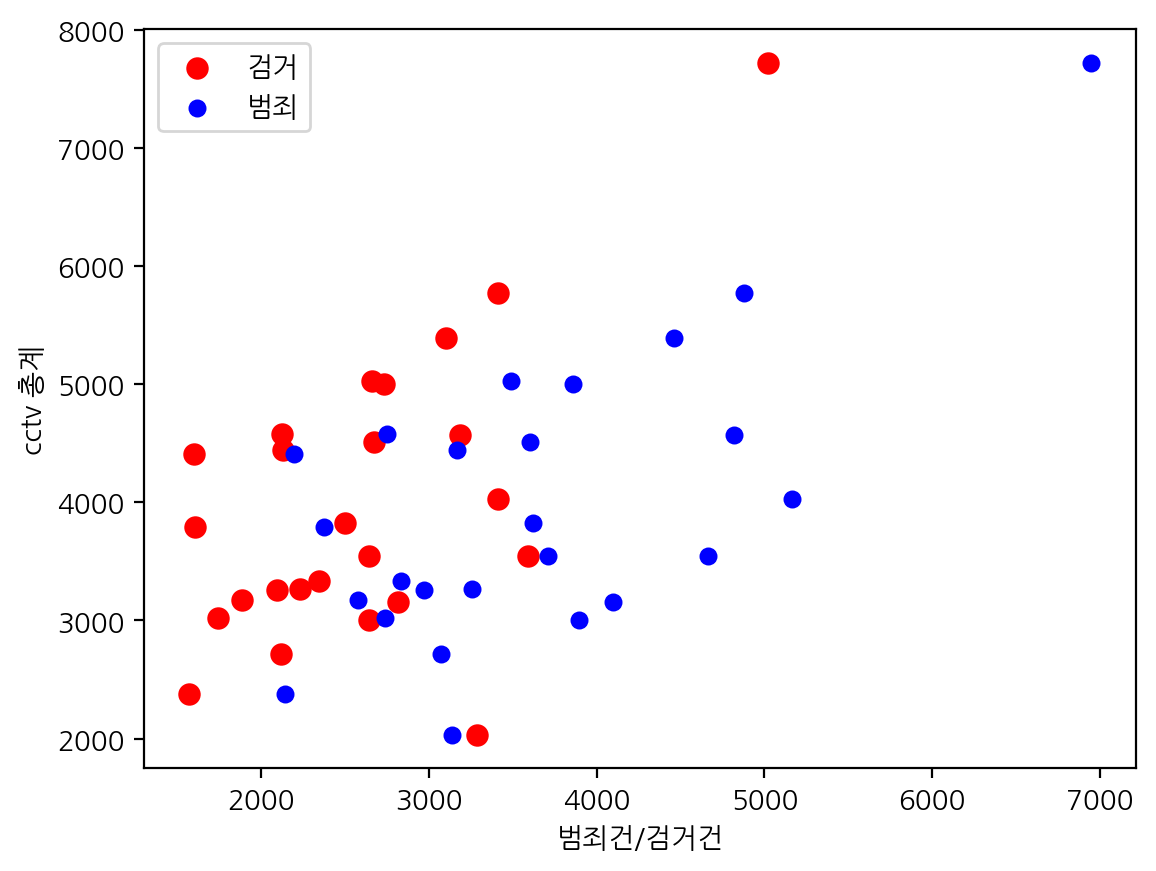

In [58]:
# pandas 로 그리기
# ax=ax : 같은 차트에 그리기


ax = df_crime_merge.plot.scatter(x='검거건',y='cctv 총계',color='r',s=50,label='검거')
df_crime_merge.plot.scatter(x='범죄건',y='cctv 총계',ax=ax,color='b',s=30,label='범죄')
plt.xlabel('범죄건/검거건')